In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt   # 그림그리기 위한 import
import sys

# CNN (Convolutional Neural Network)
   - 참고 : 
   http://aidev.co.kr/deeplearning/849
   https://doorbw.tistory.com/155

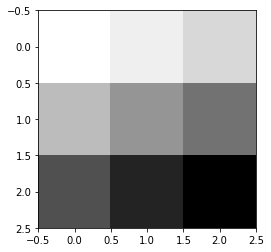

In [7]:
# 3X3X1X1 이미지 준비,  2X2X1 필터 준비

image=np.array([[[[1],[2],[3]],
                [[4],[5],[6]],
                [[7],[8],[9]]]])

image.shape
plt.imshow(image.reshape(3,3),cmap='Greys')

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]


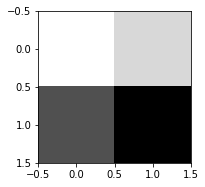

In [8]:
# 3x3X1X1 이미지, 2X2X1 필터 준비

# 이미지
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)
image.shape


# 숫자를 이미지로 뿌려주는 np 매서드 사용.
plt.imshow(image.reshape(3, 3), cmap="Greys")


# 필터
# 패딩없이, 2x2X1 필터를 스트라이드 1X1로, 4회 이동하면서 컨볼루션 레이어를 뽑겠다.
filter = tf.constant([[[[1.]], [[1.]]], [[[1]], [[1.]]]])
filter

# 컨볼루션 레이어 만드는 매서드 Conv2d()
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding = "VALID")
                      # 원본이미지  # shape 을 맞춰야 됨 -> 좌우로 1씩 채우기. 1칸씩 움직일 것이므로 1X1 기재.
                             # 필터                       # 패딩 -> 안 쓰겠다는 의미로 "VALID"
        
sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img)



conv2d_img = np.swapaxes(conv2d_img, 0, 3)

print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


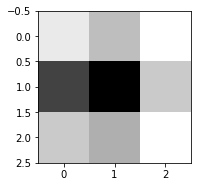

In [9]:
# 패딩을 사용한 convolution layer 추출
filter = tf.constant([[[[1.]], [[1.]]], [[[1]], [[1.]]]])
filter


# 컨볼루션 레이어 만드는 매서드 Conv2d()
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding = "SAME")
                      # 원본이미지  # shape 을 맞춰야 됨 -> 좌우로 1씩 채우기. 1칸씩 움직일 것이므로 1X1 기재.
                             # 필터                       # 패딩 -> 안 쓰겠다는 의미로 "VALID"
        
sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)

print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


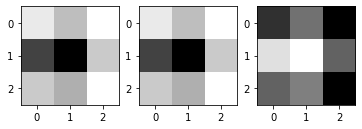

In [10]:
# 3개의 필터 사용(크기: 2*2*1*3)

filter = tf.constant([[[[1.,10,-1]], [[1.,10,-1]]], [[[1.,10,-1]], [[1.,10,-1]]]])
filter


# 컨볼루션 레이어 만드는 매서드 Conv2d()
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding = "SAME")
                      # 원본이미지  # shape 을 맞춰야 됨 -> 좌우로 1씩 채우기. 1칸씩 움직일 것이므로 1X1 기재.
                             # 필터                       # 패딩 -> 안 쓰겠다는 의미로 "VALID"
        
sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)

print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

In [11]:
# MaxPooling(2*2)

image2 = tf.constant([[[[4],[3]],[[2],[1]]]])
image2

pool = tf.nn.max_pool(image2,ksize=[1,2,2,1],strides=[1,1,1,1],
                      padding='VALID')                   # (원본이미지, 필터의 크기->ksize,)

sess = tf.Session()

p = sess.run(pool)
print(p.shape)
print(p)

sess.close()

(1, 1, 1, 1)
[[[[4]]]]


## 사례1: MNIST 손글씨 예제

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

mnist= input_data.read_data_sets('data/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


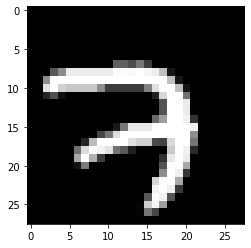

In [13]:
# 데이터확인

img = mnist.train.images[0]
img.shape

plt.imshow(img.reshape(28,28),cmap='gray')

In [14]:
# 입력값 준비

X = tf.placeholder(tf.float32, shape=[None,784])

y = tf.placeholder(tf.float32, shape=[None,10])

In [15]:
# 첫번째 Convolution Layer 작성
# 필터의 크기 : 3*3, 필터의 갯수 : 32, 색상 수 : 1


X_img = tf.reshape(X,[-1,28,28,1])           # -1 ? 


W1 = tf.Variable(tf.random_normal([3,3, 1,32],stddev=0.01))

L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')

print(L1)

L1 = tf.nn.relu(L1)
print(L1)

L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(L1)

Tensor("Conv2D_3:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 14, 14, 32), dtype=float32)


In [16]:
# 두번째 Convolution Layer 작성
# 필터의 크기 : 3*3, 필터의 갯수 : 64, 색상 수 : 1, PADDING 사용
# POOLING 필터의 크기: 2*2, strides= 2*2, padding사용

W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')   #L1과 연결이 되는 것이다. 
  
print(L2)

L2 = tf.nn.relu(L2)
print(L2)

L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(L2)

Tensor("Conv2D_4:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 7, 7, 64), dtype=float32)


In [17]:
# FC 작성(Fully Connected Layer, Dense Layer)

learning_rate = 0.001
training_epochs = 15
batch_size = 500


L2 = tf.reshape(L2,[-1,7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64,10]))
b1 = tf.Variable(tf.random_normal([10]))


logit = tf.matmul(L2,W3)+b1
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit,labels=y)

train = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

correct = tf.equal(tf.argmax(hypot,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())



for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, loss, acc = sess.run([train, tf.reduce_mean(cost),accuracy], feed_dict={X:batch_xs, y:batch_ys})   
                                                   #prob 0.7   ->  70% 만 가지고 실행
        
        print("step:{:5}\tLoss:{:.3f}\tAcc:{}".format(epoch, loss, acc))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step:    0	Loss:2.513	Acc:0.07999999821186066
step:    0	Loss:2.368	Acc:0.11999999731779099
step:    0	Loss:2.300	Acc:0.23000000417232513
step:    0	Loss:2.290	Acc:0.28999999165534973
step:    0	Loss:2.212	Acc:0.3019999861717224
step:    0	Loss:2.104	Acc:0.3540000021457672
step:    0	Loss:2.066	Acc:0.3179999887943268
step:    0	Loss:2.002	Acc:0.328000009059906
step:    0	Loss:1.906	Acc:0.41999998688697815
step:    0	Loss:1.828	Acc:0.44200000166893005
step:    0	Loss:1.721	Acc:0.5120000243186951
step:    0	Loss:1.649	Acc:0.5320000052452087
step:    0	Loss:1.595	Acc:0.5559999942779541
step:    0	Loss:1.435	Acc:0.656000018119812
step:    0	Loss:1.391	Acc:0.6179999709129333
step:    0	Loss:1.289	Acc:0.6100000143051147
step:    0	Loss:1.203	Acc:0.6600000262260437
step:    0	Loss:1.144	Acc:0.639999985694

step:    1	Loss:0.182	Acc:0.9480000138282776
step:    1	Loss:0.106	Acc:0.9779999852180481
step:    1	Loss:0.126	Acc:0.9700000286102295
step:    1	Loss:0.142	Acc:0.9559999704360962
step:    1	Loss:0.140	Acc:0.9599999785423279
step:    1	Loss:0.148	Acc:0.9559999704360962
step:    1	Loss:0.106	Acc:0.9639999866485596
step:    1	Loss:0.201	Acc:0.9520000219345093
step:    1	Loss:0.120	Acc:0.9620000123977661
step:    1	Loss:0.136	Acc:0.9559999704360962
step:    1	Loss:0.149	Acc:0.9599999785423279
step:    1	Loss:0.116	Acc:0.9639999866485596
step:    1	Loss:0.104	Acc:0.9739999771118164
step:    1	Loss:0.100	Acc:0.9700000286102295
step:    1	Loss:0.133	Acc:0.9599999785423279
step:    1	Loss:0.155	Acc:0.9559999704360962
step:    1	Loss:0.091	Acc:0.9660000205039978
step:    1	Loss:0.155	Acc:0.9539999961853027
step:    1	Loss:0.095	Acc:0.9760000109672546
step:    1	Loss:0.121	Acc:0.9660000205039978
step:    1	Loss:0.124	Acc:0.9620000123977661
step:    1	Loss:0.133	Acc:0.9599999785423279
step:    1

step:    3	Loss:0.074	Acc:0.9760000109672546
step:    3	Loss:0.095	Acc:0.9739999771118164
step:    3	Loss:0.069	Acc:0.9819999933242798
step:    3	Loss:0.084	Acc:0.9779999852180481
step:    3	Loss:0.079	Acc:0.9700000286102295
step:    3	Loss:0.086	Acc:0.972000002861023
step:    3	Loss:0.099	Acc:0.9700000286102295
step:    3	Loss:0.086	Acc:0.9760000109672546
step:    3	Loss:0.116	Acc:0.9700000286102295
step:    3	Loss:0.056	Acc:0.9860000014305115
step:    3	Loss:0.090	Acc:0.9739999771118164
step:    3	Loss:0.101	Acc:0.9739999771118164
step:    3	Loss:0.113	Acc:0.9660000205039978
step:    3	Loss:0.090	Acc:0.9739999771118164
step:    3	Loss:0.079	Acc:0.972000002861023
step:    3	Loss:0.076	Acc:0.9739999771118164
step:    3	Loss:0.092	Acc:0.9779999852180481
step:    3	Loss:0.072	Acc:0.9779999852180481
step:    3	Loss:0.129	Acc:0.9599999785423279
step:    3	Loss:0.061	Acc:0.984000027179718
step:    3	Loss:0.114	Acc:0.9679999947547913
step:    3	Loss:0.074	Acc:0.9739999771118164
step:    3	Lo

step:    4	Loss:0.090	Acc:0.9819999933242798
step:    4	Loss:0.096	Acc:0.9760000109672546
step:    4	Loss:0.070	Acc:0.9760000109672546
step:    4	Loss:0.084	Acc:0.9679999947547913
step:    4	Loss:0.074	Acc:0.9760000109672546
step:    4	Loss:0.069	Acc:0.9760000109672546
step:    4	Loss:0.077	Acc:0.9800000190734863
step:    4	Loss:0.069	Acc:0.9739999771118164
step:    5	Loss:0.063	Acc:0.9760000109672546
step:    5	Loss:0.061	Acc:0.9819999933242798
step:    5	Loss:0.053	Acc:0.9800000190734863
step:    5	Loss:0.052	Acc:0.9819999933242798
step:    5	Loss:0.045	Acc:0.9900000095367432
step:    5	Loss:0.057	Acc:0.9919999837875366
step:    5	Loss:0.052	Acc:0.9860000014305115
step:    5	Loss:0.042	Acc:0.9860000014305115
step:    5	Loss:0.054	Acc:0.9819999933242798
step:    5	Loss:0.068	Acc:0.9819999933242798
step:    5	Loss:0.056	Acc:0.9860000014305115
step:    5	Loss:0.070	Acc:0.9760000109672546
step:    5	Loss:0.056	Acc:0.9819999933242798
step:    5	Loss:0.091	Acc:0.9679999947547913
step:    5

KeyboardInterrupt: 

In [ ]:
print('정확도: ',sess.run(accuracy,feed_dict={X:mnist.test.images, y:mnist.test.labels}))

In [ ]:
# FC 작성(Fully Connected Layer, Dense Layer)
# batch 처리 직접 작성

learning_rate = 0.001
training_epochs = 15
batch_size = 500


L2 = tf.reshape(L2,[-1,7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64,10]))
b1 = tf.Variable(tf.random_normal([10]))


logit = tf.matmul(L2,W3)+b1
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit,labels=y)

train = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

correct = tf.equal(tf.argmax(hypot,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())



for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.images[i*batch_size:i*batch_size+batch_size],\
        mnist.train.labels[i*batch_size:i*batch_size+batch_size]
        
        
        _, loss, acc = sess.run([train, tf.reduce_mean(cost),accuracy], feed_dict={X:batch_xs, y:batch_ys})   
                                                   
        
        print("step:{:5}\tLoss:{:.3f}\tAcc:{}".format(epoch, loss, acc))

In [ ]:
type(mnist.train.images)

mnist.train.labels

### 사례2: 교통표지판
   - 샘플제공 사이트: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
   
   
     이미지(32*32)  -> Convolution Layer1 -> Max Pooling -> Convolution Layer2
     -> Max Pooling -> FC 
   

#### 이미지 전처리

In [18]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize   # 똑같은 크기로 맞춰주기 위해 사용
from collections import namedtuple
np.random.seed(101)       # 랜덤값 고정

In [19]:
N_CLASSES = 43

RESIZED_IMAGE = (32,32)

In [20]:
Dataset = namedtuple('Dataset',['X','y'])   # nametuple에 넣으면 수정할 수 없어서 데이터를 안전하게 보관할 수 있다. 

dir(Dataset)

['X',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'y']

In [21]:
# 이미지를 읽어오기 위한 함수

def read_dataset_ppm(rootpath,n_labels, resize_to):
    image = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath+'/'+format(c,'05d')+'/'
        
        for img_name in glob.glob(full_path + '*.ppm'):
            img =plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img/255.0)[:,:,0]
            
            if resize_to:
                img = resize(img,resize_to)
                
            label = np.zeros((n_labels),dtype=np.float32)
            label[c] = 1.0
            
            image.append(img.astype(np.float32))
            labels.append(label)
        #plt.imshow(img)  
        img_x = np.stack([img[:,:,np.newaxis] for img in image]).astype(np.float32)
        #print(img_x.shape)
        img_y=np.matrix(labels).astype(np.float32)
        
    return Dataset(X=img_x,y=img_y)

In [22]:
dataset = read_dataset_ppm('data/Tensorflow(5)-cnn/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images',
                          N_CLASSES,RESIZED_IMAGE)

In [23]:
print(dataset.X.shape)
print(dataset.y.shape)

(39209, 32, 32, 1)
(39209, 43)


#### 훈련용,테스트용 데이터분리

In [24]:
from sklearn.model_selection import train_test_split

idx_train,idx_test = train_test_split(range(dataset.X.shape[0]),test_size = 0.25,random_state=101)
#테스트용 25%, 훈련 75%  


print(idx_train,idx_test)
X_train=dataset.X[idx_train, :,:,:]
X_test = dataset.X[idx_test, :,:,:]

y_train= dataset.y[idx_train, :]
y_test=dataset.y[idx_test,:]

[271, 23055, 34387, 28229, 26437, 3760, 30266, 11625, 24743, 6505, 24741, 2517, 10291, 12367, 27939, 19672, 8893, 36703, 10980, 16413, 29040, 8857, 36000, 1664, 1148, 34985, 33020, 2259, 32056, 2092, 30398, 13535, 18124, 20550, 19968, 4894, 500, 24729, 19412, 37754, 30099, 1743, 10786, 24983, 38934, 13437, 12750, 24816, 38038, 3618, 16837, 4431, 6711, 26524, 21968, 38315, 18086, 29556, 14740, 19058, 13404, 38216, 12430, 9089, 17661, 38515, 14220, 11093, 37343, 16241, 35542, 11523, 20733, 31353, 34834, 1856, 31559, 30825, 30473, 24687, 25456, 11398, 36114, 12897, 6224, 32111, 2958, 23719, 5366, 15161, 10926, 25108, 10940, 38494, 37517, 9111, 14505, 31579, 24516, 37027, 20303, 23963, 32938, 21073, 21540, 22146, 13590, 6644, 1931, 35935, 313, 26766, 35254, 23029, 16060, 14619, 35633, 13082, 21630, 22685, 2618, 38355, 7775, 23489, 3933, 30128, 10707, 35031, 8313, 28257, 21262, 28524, 36996, 935, 37078, 23003, 24790, 22817, 21775, 27758, 1889, 5582, 35618, 35441, 37460, 20698, 12763, 24577,

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


#### 모델구성
      - 1st 2차원 Convolution Layer : 5*5의 32개 필터사용
      - 2nd 2차원 Convolution Later : 5*5의 64개 필터사용
      - FC layer : 1024개의 unit 사용
      - Dropout 40%
      - Xavier 초기화 사용

In [26]:
def minibatcher(X,y,batch_size,shuffle):
    assert X.shape[0]==y.shape[0]
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else :
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k+batch_size
        to_idx=(k+1)*batch_size
        yield X[idx[from_idx:to_idx], :,:,:],y[idx[from_idx:to_idx],:]
        
        
# yield?         

In [27]:
#minbatcher 함수의 테스트코드
for mb in minibatcher(X_train,y_train,10000,True):
    print(mb[0].shape,mb[1].shape)

(0, 32, 32, 1) (0, 43)
(9999, 32, 32, 1) (9999, 43)
(19404, 32, 32, 1) (19404, 43)


In [28]:
# FC layer 

def fc_no_activation_layer(in_tensors,n_units):
    W = tf.get_variable('fc_W',shape=[in_tensors.get_shape()[1],n_units],     # 상수가 들어가야 해서 shape을 쓴다
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_b',[n_units],tf.float32,tf.constant_initializer(0,0))
    
    return tf.matmul(in_tensors,W)+b

def fc_layer(in_tensors,n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors,n_units))

In [29]:
# Convolution Layer

def conv_layer(in_tensors,kernel_size,n_units):
    W = tf.get_variable('conv_W',[kernel_size,kernel_size,in_tensors.get_shape()[3],n_units],
                        tf.float32,tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_b',[n_units],tf.float32,tf.constant_initializer(0,0))

    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors,W,[1,1,1,1],'SAME')+b)

def maxpool_layer(in_tensors,sampling):
    return tf.nn.max_pool(in_tensors,[1,sampling,sampling,1],[1,sampling,sampling,1],'SAME')


def dropout(in_tensors,keep_proba,is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors,keep_proba),lambda:in_tensors )

In [30]:

# 하다가 갑자기 지움.   ??????
sess=tf.Session()

x1 = tf.placeholder(tf.float32,shape=(None,32,32,1))
y1 = tf.placeholder(tf.float32,shape=(None,43))


for mb in minibatcher(X_train,y_train,10000,True):
    fc_layer(mb[0],mb[1])
    

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

In [31]:
def model(in_tensors,is_training):    # in_tensors = 입력데이터
    # 1st Conv Layer 작성 : 5*5, 32개의 필터, 2칸 이동하는 maxpool, 20%dropout
    with tf.variable_scope('L1'):
        l1 = maxpool_layer(conv_layer(in_tensors,5,32),2)
        l1_out = dropout(l1,0.8,is_training)
                
    # 1st Conv Layer 작성 : 5*5 64개의 필터, 칸 이동하는 maxpool, 20%dropout
    with tf.variable_scope('L2'):
        l2 = maxpool_layer(conv_layer(l1_out,5,64),2)
        l2_out = dropout(l2,0.8,is_training)
        
        
    # 평면화
    with tf.variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # Fully connected Layer, 1024 neurous, 40$ dropout
    with tf.variable_scope('L3'):
        l3 = fc_layer(l2_out_flat,1024)
        l3_out = dropout(l3,0.6,is_training)
        
    # output
    with tf.variable_scope('out'):
        out_tensors = fc_no_activation_layer(l3_out,N_CLASSES)
        
    return out_tensors    

In [32]:
def train_model(X_train,y_train,X_test,y_test,learning_rate,max_epochs,batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32,shape=(None,RESIZED_IMAGE[0],RESIZED_IMAGE[1],1))
    
    in_y_tensors_batch = tf.placeholder(tf.float32,shape=(None,N_CLASSES))
    
    is_training = tf.placeholder(tf.bool)
    
    logit= model(in_X_tensors_batch,is_training)          # 위에 있는 model함수 사용
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=in_y_tensors_barch)
    
    loss = tf.reducr_mean(loss_score)
    train = tf.train.AdadeltaOptimizer(learing_rate).minimize(loss)
    
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(max_epochs):
        print('Epoch=',epochs)
        tf_score = []
         
        for mb in minibatcher(X_train,y_train,batch_size,True):
            tf_output = sess.run([train,loss],feed_dict={in_X_tensors_batch:mb[0],
                                            in_y_tensors_batch:mb[1],
                                             is_training:True})
            tf_score.append(tf_output[1])
            
        print('training_loss_score = ',np.mean(tf_score))
        
   ################################################################# 훈련종료.
   ################################### 테스트진행
    print('\n\nTEST SET PERFORMANCE') 

    y_test_pred, test_loss = sess.run([out_y_pred,loss],feed_dict={in_X_tensors_batch:X_test,
                                            in_y_tensors_batch:y_test,
                                             is_training:False})
    
    print('test_loss_score=',test_loss)
    y_test_pred_classified = np.argmax(y_test_pred,axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test,axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified,y_test_pred_classified))
          

In [33]:
from sklearn.metrics import classification_report

tf.reset_default_graph()
train_model(X_train,y_train,X_test,y_test,0.001,10, 256)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


TypeError: Cannot convert value 0 to a TensorFlow DType.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Epoch= 0
 train_loss_score= 4.2951465
Epoch= 1
 train_loss_score= 0.687547
Epoch= 2
 train_loss_score= 0.3363553
Epoch= 3
 train_loss_score= 0.21459332
Epoch= 4
 train_loss_score= 0.14248888
Epoch= 5
 train_loss_score= 0.1128909
Epoch= 6
 train_loss_score= 0.09870647
Epoch= 7
 train_loss_score= 0.07912263
Epoch= 8
 train_loss_score= 0.06445054
Epoch= 9
 train_loss_score= 0.061251685
TEST SET PERFORMANCE
 test_loss_score= 0.060901828
              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.97      0.99      0.98       539
           2       0.99      0.99      0.99       558
           3       0.99      0.96      0.98       364
           4       1.00      0.99      0.99  

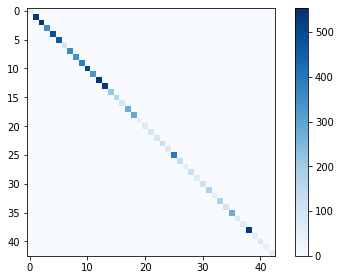

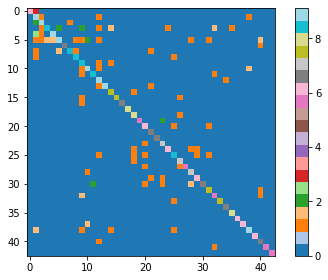

In [35]:
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
import numpy as np
np.random.seed(101)
%matplotlib inline

Dataset = namedtuple('Dataset', ['X', 'y'])

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
  
    for c in range(n_labels):
        full_path = rootpath + '/' + format(c, '05d') + '/'
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:,:,0]
        
            if resize_to:
                img = resize(img, resize_to, mode='reflect')
      
            label = np.zeros((n_labels, ), dtype=np.float32)
            label[c] = 1.0
      
            images.append(img.astype(np.float32))
            labels.append(label)
    return Dataset(X = to_tf_format(images).astype(np.float32), y = np.matrix(labels).astype(np.float32))

dataset = read_dataset_ppm('data/Tensorflow(5)-cnn/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images', N_CLASSES, RESIZED_IMAGE)

from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]



def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
  
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
  
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k*batch_size
        to_idx = (k+1)*batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]


import tensorflow as tf

def fc_no_activation_layer(in_tensors, n_units):
    w = tf.get_variable('fc_W', [in_tensors.get_shape()[1], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_B', [n_units, ], tf.float32, tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, w) + b

def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], 'SAME')
  
def conv_layer(in_tensors, kernel_size, n_units):
    w = tf.get_variable('conv_W', [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_B', [n_units, ], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, w, [1, 1, 1, 1], 'SAME') + b)

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda: tf.nn.dropout(in_tensors, keep_proba), lambda: in_tensors)

  
def model(in_tensors, is_training):
    # First layer: 5x5 2d-conv, 32 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
  
      # Second layer: 5x5 2d-conv, 64 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
    
    with tf.variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
  
    # Fully collected layer, 1024 neurons, 40% dropout 
    with tf.variable_scope('l3'):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
  
    # Output
    with tf.variable_scope('out'):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
  
    return out_tensors



from sklearn.metrics import classification_report, confusion_matrix

def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape = (None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)

    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_score = []
      
            for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
                tf_output = session.run([optimizer, loss], feed_dict = {in_X_tensors_batch : mb[0], in_y_tensors_batch : mb[1], is_training : True})
                tf_score.append(tf_output[1])
        
            print(" train_loss_score=", np.mean(tf_score))
    
        # after the training is done, time to test it on the test set
        print("TEST SET PERFORMANCE")
        y_test_pred, test_loss  = session.run([out_y_pred, loss], feed_dict = {in_X_tensors_batch : X_test, in_y_tensors_batch : y_test,   is_training : False})
        print(" test_loss_score=", test_loss)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()


tf.reset_default_graph()
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)